# 모델 훈련
---
* 모델 작동법을 알면 적절한 모델,올바른 훈련 알고리즘,작업에 맞는 좋은 하이퍼파라미터를 찾을 수 있고 효율적으로 분석 할 수 있다.
### 선형회귀
* 집접 게산할 수 있는 공식을 사용하여 훈련세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구할것이다.
* 경사하강법이라 불리는 반복적인 최적화 방식을 사용해, 모델 파라미터를 조금씩 바꾸면서 비용함수를 훈련 세트에 대해 최소화시킨다. 신경망에서 계속 사용하게 될 배친 경사하강법, 미니배치 경사하강법,확률적 경사하강법 을 학습한다.
---
### 선형회귀
*예측값= 입력 특성의 가중치 합과 편향상수를 더한다
*Y(HAT)=O*X
*모델을 훈련시키는 것은 훈련셑트에 가장 잘 못도록 모델 파라미터를 설정하는 것
*회귀에 가장 잘 사용되는 성능 측정 지표는 평균제곱근오차(RMSE)이다.
---
### 정규방정식
* 비용함수를 최소화하는 가중치 값을 찾기위한 해석적 방법을 정규방정식이라한다.
*O(hat)=(X(T)X)(inv)X(T)y


In [44]:
import numpy as np
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

*무작위로 선정한 선형 데이터셋

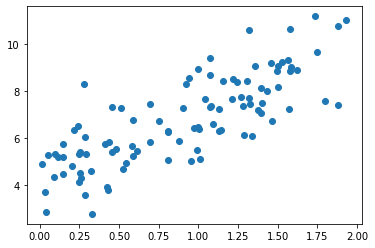

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [46]:
x_b=np.c_[np.ones((100,1)),x]
theba_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [47]:
theba_best

array([[4.3157915 ],
       [2.76667961]])

In [48]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theba_best)
y_predict

array([[4.3157915 ],
       [9.84915072]])

* 예측선 그리기

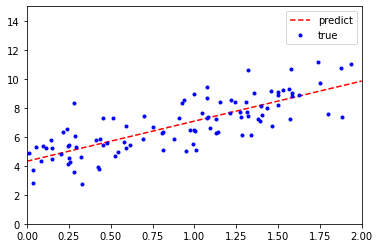

In [49]:
#
plt.plot(x_new,y_predict,"r--")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.legend(["predict","true"])
plt.show()

*사이킷런 선형회귀

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)
print(lin_reg.predict(x_new))

[4.3157915] [[2.76667961]]
[[4.3157915 ]
 [9.84915072]]


In [51]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.3157915 ],
       [2.76667961]])

* 유사역행렬(X(+))을 구한다. np.linalg.pinv()
*유사역행렬은 특잇값 분해(svd)라고 부르는 표준 행렬 분해 기법을 사용한다.
* SVD는 X를 X(+)=VE+U(T)로 계산한다.
* m<n 이거나 X(T)X의 역행렬이 없다면 정규방정식이 작동하지 않는다.

In [52]:
np.linalg.pinv(x_b).dot(y)

array([[4.3157915 ],
       [2.76667961]])

### 계산복잡도
---
* 정규방정식은 (n+1)*(n+1)크기의 X(T)X의 역행렬을 계산한다.
* 역행렬 계산복잡도는 일반적으로 O(n^2,4)에서 O(n^3)사이이다.
*SVD의 계산복잡도는 약 O(n^2)이다.
---
### 경사하강법
* 여러 종류의 문제에서 최적의 해법을 찾는 일반적인 최적화 알고리즘
* 아이디어는 비용함수를 최소화 하기 위해 반복해서 파라미터를 조정하는것
* 그레디언트가 감소하는 방향으로 진행하며 0이되면 최솟값에 도달 한 것.
* O를 임의의 값으로 시작해서 조금씩 감소되는 방향으로 진행.
* 중요한 파라미터는 학습률이다.
* 학습률이 너무 작으면 오래걸리고 너무 오래걸리면 최적화 선을 넘어가서 발산 할 수도 있다.
* 전역 최솟값보다 지역 최솟값에 수렴한다.
* MSE 비용함수는 어떤 두점을 선택해 선을 그어도 곡선을 가로지르지 않는 블록 함수이다.
이는 지역 최솟값이 없고 하나의 전역 최솟값이 있다는 뜻이다. 또한, 연속함수이고 기울기가 갑자기 변하지 않는다
* 스케일이 다르면 최적화 하는 시간이 오래걸린다.
* 차원이 커질수록 검색이 더 어려워진다.
---
### 배치 경사 하강법
* 경사하강법을 구현하기 위해 O(j)값의 비용함수의 그레디언트를 계산해야한다. 즉, O(j)가 조금 변경될 때 비용함수가 얼마나 바뀌는지 계산해야한다. 이를 편도함수라고 한다.
* MSE의 편도함수는 MSE를 각 O(j)에 대해서 편미분 하면 된다.
* O(next-step)=O-(학습률)*(MSE 편미분값)

In [53]:
eta=0.3
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
  gradients=2/m*x_b.T.dot(x_b.dot(theta)-y) # 그레디언트 편미분값 계산
  theta=theta-eta*gradients # 그레디언트 값에서 학습률*그레디언트 값 뺀다.

In [54]:
theta

array([[4.3157915 ],
       [2.76667961]])

* 적절한 학습률을 찾기 위해서는 그리드 탐색을 사용한다.
* 그리드탐색에서 수렴하는데 너무 오래걸리는 모델을 막기 위해 반복 횟수를 제한해야한다.
* 반복 횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값(허용오차 e)보다 작아지면 경사 하강법이 거의 최솟값이므로 알고리즘 중지하는 방식!
* 허용호차 e를 1/10으로 줄이면 알고리즘의 반복이 10배 늘어난다.(수렴율)
---
## 확률적 경사 하강법
* 배치 경사하강법의 가장 큰 문제는 매 스텝에서 전체 훈련세트를 사용하는 것.
* 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다.
* 반복당 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련세트도 훈련 가능
* 확률적이므로 배치 경사하강법 보다 훨씬 불안정하다.
  * 최솟값까지 요동치며 평균적으로 감소한다.
  * 최솟값에 근접하겠지만 요동이 지속되며 최솟값에 안착하지는 못한다. 최종적으로 반복이 끝날때 최적치는 아닐 것이다.
* 지역최솟값을 뛰어 넘을 것이므로 전역 최솟값을 찾을 가능성이 높다.
  * 전역 최솟값에 다다르기 위해 학습률을 점진적으로 감소시킨다.(담금질 기법)
  * 매 반복마다 학습률을 결정하는 함수를 학습 스케줄 이라고 부른다.
    * 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수 있고, 너무 천천히 줄어들면 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있다.

* 한 반복에서 m번 되풀이 되고 이때 각 반복에서 m번 되풀이 되고 이때, 각 반복을 에포크라고한다.

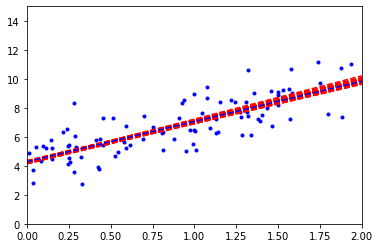

array([[4.28002983],
       [2.77714151]])

In [55]:
n_epochs=50 # 반복수
t0,t1=5,50 # 학습률 감소범위
def learning_schedule(t): # 학습률 감소 함수
  return t0/(t+t1)
theta=np.random.randn(2,1)
plt.plot(x,y,"b.")
for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m) # 랜덤으로 m번 실행 인덱스
    xi=x_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi) # 손실삼수의 미분값
    eta=learning_schedule(epoch*m+i) # 학습률- 5/(epoch*m+i)
    theta=theta-eta*gradients #학습률 그레디언트 빼기!
  x_new_my=np.array([[0],[2]])
  x_new_b_my=np.c_[np.ones((2,1)),x_new_my]
  y_predict=x_new_b_my.dot(theta)
  plt.plot(x_new_my,y_predict,"r--") # 선형이 그려지는 방식
plt.plot(x_new_my,y_predict,"b--")# 최종 선 그려보기
plt.axis([0,2,0,15])
plt.show()
theta

* 사이킷런 경사하강법 선형 회귀

In [56]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,eta0=0.1)
sgd_reg.fit(x,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([4.25545469]), array([2.73618011]))

### 미니배치 경사 하강법
*전체나 하나의 샘플을 사용하는 것이 아닌 미니배치라 부르는 작은 샘플 세트로 계산
*GPU를 사용한다.
* SGD보다 덜 불규칙적으로 움직인다.
*적절한 학습 스케줄을 사용하면 최솟값에 도달한다.
---
### 다항회귀
* 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있다.
*각 특성의 거듭제곱을 새로운 특성으로 추가하고 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는것

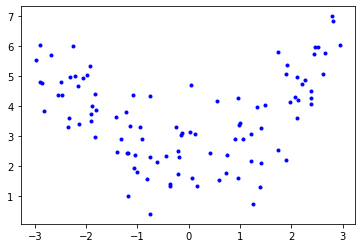

In [57]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+2+np.random.randn(m,1)
plt.plot(x,y,"b.")

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)#각 특성을 제곱하여 새로운 특성으로 추가한다.
x_poly=poly_features.fit_transform(x)
print(x[0],x_poly[0])

[-2.90619536] [-2.90619536  8.4459715 ]


In [59]:
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.33735996]), array([[0.09753553, 0.42413204]]))

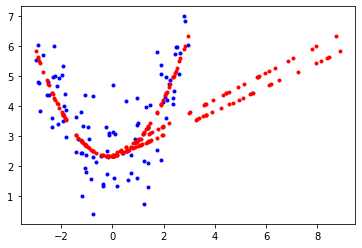

In [60]:
plt.plot(x,y,"b.")
plt.plot(x_poly,lin_reg.predict(x_poly),"r.")
plt.show()

### 학습곡선

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,x,y):
  x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
  train_errors,val_errors=[],[]
  for m in range(1,len(x_train)):
    model.fit(x_train[:m],y_train[:m])
    y_train_predict=model.predict(x_train[:m])
    y_val_predict=model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="훈련세트")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="검증세트")
  plt.axis([0,80,0,3])

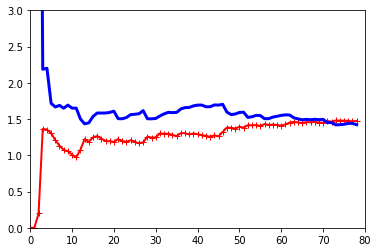

In [62]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,x,y)

*과소적합 된 모델이다
* 훈련세트에 하나, 두개의 샘플이 있을때는 모델이 완벽하게 작동하다 샘플이 추가되면서 잡음이 심해지고 비선형이기에 완전하지 못하다.
* 선형 회귀 직선은 데이터를 잘 모델링 할 수 없으므로 오차의 감소가 완만해진다.
* 전형적인 과소적합.
---
* 10차 다항 회귀 모델의 학습곡선

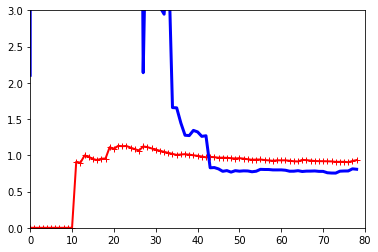

In [63]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
                                ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                                ("lin_reg",LinearRegression())
])
plot_learning_curves(polynomial_regression,x,y)

* 편향/분산 트레이드오프
  * 일반화 오차는 세가지 다른종류의 오차의 합이다.
  * 편향 = 일반화 오차중에서 잘못된 가정으로 인한것, 편향이 큰 모델은 과소적합 되기쉽다.
  * 분산 = 훈련데이터의 작은 변동에 모델이 과도하게 민감하기 때문, 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 잇다.
  * 줄일 수 없는 오차 = 데이터의 잡음때문에 발생, 데이터를 수정해야한다.
---
# 규제가 있는 선형 모델
* 자유도를 줄이므로 과대적합을 줄인다.
* 다항 회귀 모델의 간단한 규제는 차수 감소
* 선형 회귀 모델에서는 보통 모델의 가중치를 제한한다. 
*'릿지',"리쏘","엘라스틱넷"
---
### 릿지 회귀 l2
* 규제가 추가된 선형 회귀
* 규제항이 추가되었고 모델의 가중치가 가능한 작게 유지되도록 노력
* W를 특성의 가중치 벡터라 하면 규제항은 1/2(||W||)^2와 같다. 이는 노름이다.
* MSE에 aW를 더하면 된다.
* 정규방정식과 경사하강법을 사용 가능하다. 정규방정식을 통해 릿지회귀를 할 경우 LU분해를 이용한다.

In [65]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[3.73366334]])

In [68]:
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([3.70060612])

### 라쏘 회귀 l1